In [ ]:
import json
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("hfl/chinese-roberta-wwm-ext")

with open("./data/ChID/dev_data.json", "r", encoding="utf-8") as f:
    dev_data = []
    for line in f.readlines():
        dev_data.append(json.loads(line))

with open("./data/ChID/test_data.json", "r", encoding="utf-8") as f:
    test_data = []
    for line in f.readlines():
        test_data.append(json.loads(line))

with open("./data/ChID/train_data_1w.json", "r", encoding="utf-8") as f:
    train_data_1w = []
    for line in f.readlines():
        train_data_1w.append(json.loads(line))

with open("./data/ChID/train_data_5w.json", "r", encoding="utf-8") as f:
    train_data_5w = []
    for line in f.readlines():
        train_data_5w.append(json.loads(line))

with open("./data/ChID/train_data_10w.json", "r", encoding="utf-8") as f:
    train_data_10w = []
    for line in f.readlines():
        train_data_10w.append(json.loads(line))

with open("./data/ChID/train_data.json", "r", encoding="utf-8") as f:
    train_data = []
    for line in f.readlines():
        train_data.append(json.loads(line))

In [2]:
print(tokenizer.mask_token)
print(tokenizer.mask_token_id)
print(tokenizer.cls_token)
print(tokenizer.cls_token_id)
print(tokenizer.sep_token)
print(tokenizer.sep_token_id)
print(tokenizer.pad_token)
print(tokenizer.pad_token_id)
print(tokenizer.unk_token)
print(tokenizer.unk_token_id)
tokenizer.encode("我是中国人")

[MASK]
103
[CLS]
101
[SEP]
102
[PAD]
0
[UNK]
100


[101, 2769, 3221, 704, 1744, 782, 102]

In [3]:
from collections import Counter
from matplotlib import pyplot as plt
idiom_mark = '#idiom#'

def clac_process(dataset):
    token_lens = []
    idioms = []
    truth_idioms = []
    idiom_num = 0
    
    for data in dataset:
        sentence = data["content"]
        sentence.replace(idiom_mark,tokenizer.mask_token*4)
    
        tokens = tokenizer.tokenize(sentence)
        token_lens.append(len(tokens))
        
        idiom_candidate = data["candidates"]
        idiom_num += len(idiom_candidate)
        for idiom in idiom_candidate:
            idioms.extend(idiom)
        truth_idioms.extend(data["groundTruth"])
        
    return idiom_num,token_lens,Counter(idioms),Counter(truth_idioms)
    

In [4]:
def plot_idioms(idiom_counter,word_list,title):
    idioms_freq = []
    for i,word in enumerate(word_list):
        idioms_freq.extend([i]*idiom_counter[word])
    plt.hist(idioms_freq, bins=len(word_list))
    plt.ylabel("Frequency")
    plt.xlabel("Idioms")
    plt.title(title)
    plt.show() 

In [5]:
train_num,token_train,idioms_train,true_idioms_train = clac_process(train_data)
dev_num,token_dev,idioms_dev,true_idioms_dev = clac_process(dev_data)
test_num,token_test,idioms_test,true_idioms_test = clac_process(test_data)

print("idiom space in train dataset:",train_num)
print("idiom space in dev dataset:",dev_num)
print("idiom space in test dataset:",test_num)

idiom space in train dataset: 648920
idiom space in dev dataset: 24822
idiom space in test dataset: 24948


In [7]:
word_list = [k for k,v in idioms_train.most_common()]

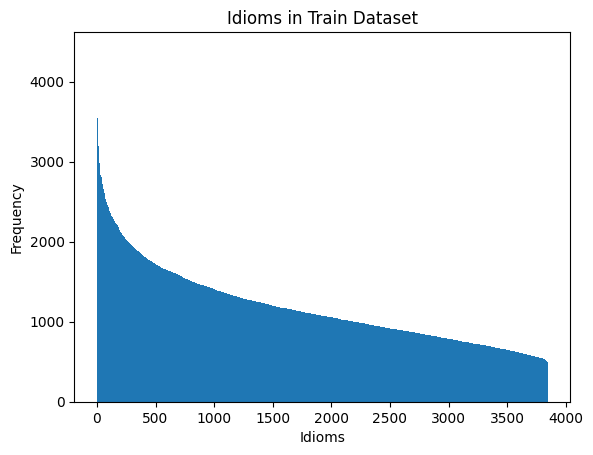

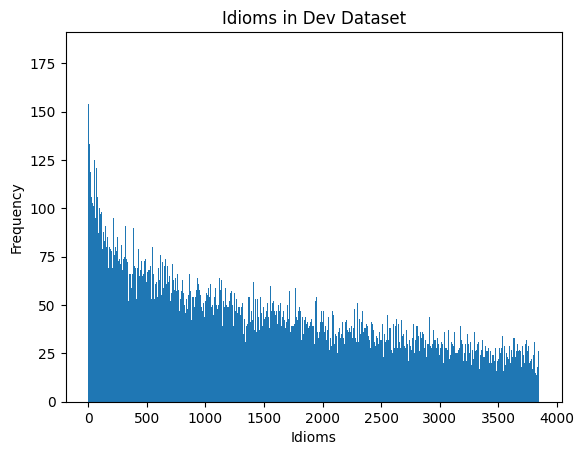

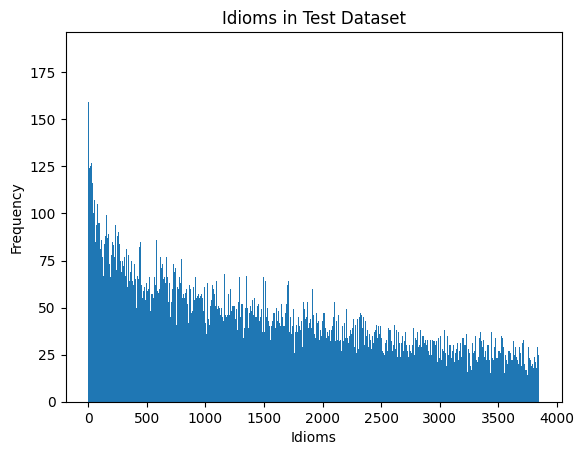

In [8]:
plot_idioms(idioms_train,word_list,"Idioms in Train Dataset")
plot_idioms(idioms_dev,word_list,"Idioms in Dev Dataset")
plot_idioms(idioms_test,word_list,"Idioms in Test Dataset")

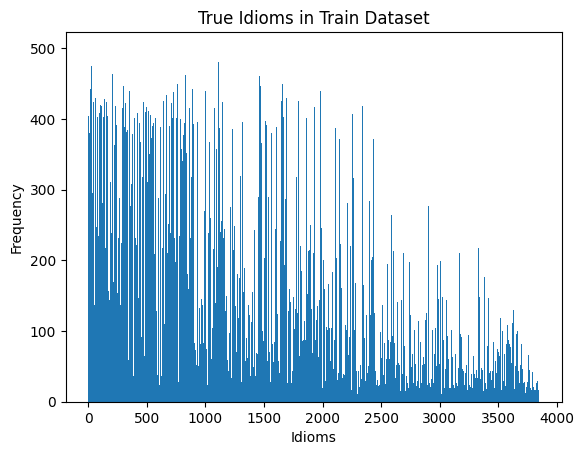

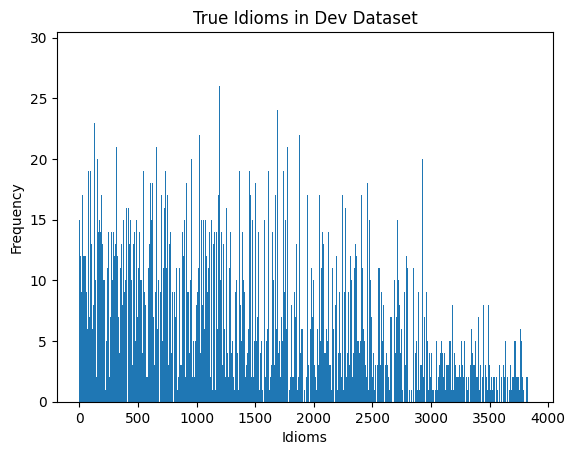

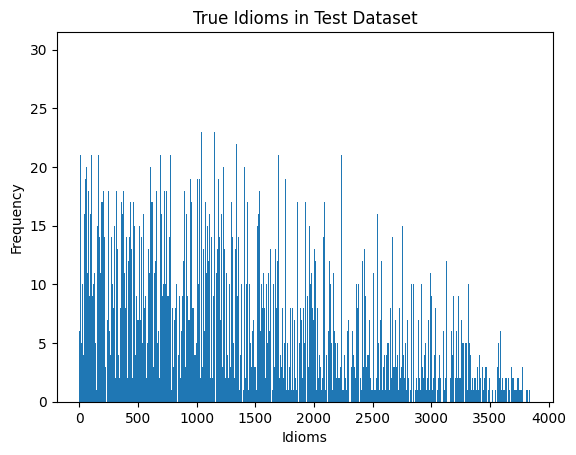

In [9]:
plot_idioms(true_idioms_train,word_list,"True Idioms in Train Dataset")
plot_idioms(true_idioms_dev,word_list,"True Idioms in Dev Dataset")
plot_idioms(true_idioms_test,word_list,"True Idioms in Test Dataset")

In [10]:
with open("./data/idioms.json","r",encoding="utf-8") as f:
    idioms = json.load(f)

idioms_dict = {}
for idiom in idioms:
    idioms_dict[idiom["word"]] = idiom["explanation"]

In [11]:
len(idioms_dict)

30895

In [13]:
idioms_out_of_vocab = []
for idiom in word_list:
    if idiom not in idioms_dict:
        idioms_out_of_vocab.append(idiom)
print(len(idioms_out_of_vocab))
idioms_out_of_vocab

28


['声名鹊起',
 '摇摇摆摆',
 '听天任命',
 '留连忘返',
 '指指点点',
 '英姿勃发',
 '紧要关头',
 '笨手笨脚',
 '相提而论',
 '无济於事',
 '耿耿於怀',
 '御驾亲征',
 '呲牙咧嘴',
 '疲於奔命',
 '破釜沈舟',
 '血肉相联',
 '知行合一',
 '笨头笨脑',
 '一乾二净',
 '众所瞩目',
 '瘦骨棱棱',
 '纹风不动',
 '繁文缛礼',
 '童男童女',
 '青出於蓝',
 '张三李四',
 '秀外惠中',
 '沧海横流']

In [15]:
idioms_dict['声名鹊起'] = '形容知名度迅速提高。'
idioms_dict['摇摇摆摆'] = '①形容主意不定。②行走不稳的样子。③坦然自得的样子。'
idioms_dict['听天任命'] = '听凭命运的摆布，不作主观努力。'
idioms_dict['留连忘返'] = '玩乐时留恋不愿离开。留恋得忘记了回去。'
idioms_dict['指指点点'] = '指给人点化或背后评论人。'
idioms_dict['英姿勃发'] = '形容英俊威武的样子。'
idioms_dict['紧要关头'] = '比喻有关事情成败的关键或时机。'
idioms_dict['笨手笨脚'] = '形容动作不灵活。'
idioms_dict['相提而论'] = '把不同的人或不同的事放在一起谈论或看待。'
idioms_dict['无济於事'] = '对事情没有什么帮助或益处。比喻不解决问题。'
idioms_dict['耿耿於怀'] = '不能忘怀，牵萦于心。'
idioms_dict['御驾亲征'] = '指皇帝亲自出征。'
idioms_dict['呲牙咧嘴'] = '露出牙齿，咧开嘴巴；形容相貌凶狠或样子难看；形容难以忍受的怪模样。'
idioms_dict['疲於奔命'] = '①因受命奔走而搞得很累。②忙于奔走应付，弄得非常疲乏'
idioms_dict['破釜沈舟'] = '比喻下决心不顾一切地干到底。'
idioms_dict['血肉相联'] = '比喻关系十分密切，不可分离。'
idioms_dict['知行合一'] = '指认识事物的道理与实行其事，是密不可分的一回事。'
idioms_dict['笨头笨脑'] = '形容不聪明，头脑反应迟钝。'
idioms_dict['一乾二净'] = '形容十分彻底，一点儿也不剩。'
idioms_dict['众所瞩目'] = '为众人所注目。'
idioms_dict['瘦骨棱棱'] = '瘦得连骨头都露出来，形容十分消瘦。'
idioms_dict['纹风不动'] = '一点儿也不动。形容没有丝毫损坏或改变。'
idioms_dict['繁文缛礼'] = '过分繁琐的仪式或礼节。也比喻其他繁琐多余的事项。'
idioms_dict['童男童女'] = '未婚的男孩与女孩。'
idioms_dict['青出於蓝'] = '青是从蓝草里提炼出来的，但颜色比蓝更深。比喻学生超过老师或后人胜过前人。'
idioms_dict['张三李四'] = '假设的名字，泛指某人或某些人。'
idioms_dict['秀外惠中'] = '外表秀丽，内心聪明。'
idioms_dict['沧海横流'] = '海水四处奔流。比喻政治混乱，社会动荡。'

In [16]:
idioms_dict

{'阿鼻地狱': '阿鼻梵语的译音，意译为无间”，即痛苦无有间断之意。常用来比喻黑暗的社会和严酷的牢狱。又比喻无法摆脱的极其痛苦的境地。',
 '阿党比周': '指相互勾结，相互偏袒，结党营私。',
 '阿党相为': '阿党偏袒、偏私一方。为了谋求私利相互偏袒、包庇。',
 '阿狗阿猫': '旧时人们常用的小名。引申为任何轻贱的，不值得重视的人或著作。',
 '阿姑阿翁': '阿名词的前缀。姑丈夫的母亲。翁丈夫的父亲。指公公婆婆。',
 '阿家阿翁': '阿名词的前缀。家通姑”，丈夫的母亲。翁丈夫的父亲。指公公婆婆。',
 '阿娇金屋': '阿娇指汉武帝刘彻的姑母（长公主刘娇）的女儿。原指汉武帝刘彻要用金屋接纳阿娇为妇。这里泛指美丽高贵的女子。',
 '阿猫阿狗': '旧时人们常用的小名。引申为任何轻贱的，不值得重视的人或著作。',
 '阿弥陀佛': '佛教语，信佛的人用作口头诵颂的佛号，表示祈祷祝福或感谢神灵的意思。',
 '阿毗地狱': '阿毗梵语的译音，意译为无间”，即痛苦无有间断之意。常用来比喻黑暗的社会和严酷的牢狱。又比喻无法摆脱的极其痛苦的境地。',
 '阿平绝倒': '以之比喻对对方的言论极为佩服。亦用为讥讽言论极为乖谬，常贻笑大方。',
 '阿其所好': '阿曲从；其他的；好爱好。指为取得某人的好感而迎合他的爱好。',
 '阿时趋俗': '阿迎合。迎合时尚和世俗。',
 '阿世盗名': '阿世曲意博取世人的欢心。用博取世人的欢心的方法来窃取名誉。',
 '阿世媚俗': '指曲意迎合当时社会的陈规陋俗。',
 '阿世取容': '指迎合世俗，取悦于人。',
 '阿意取容': '指曲从其意，以取悦于人。',
 '阿谀谄媚': '阿谀迎合别人的意思，向人讨好；谄媚巴结，奉承。说话做事迎合别人的心意，竭力向人讨好。',
 '阿谀逢迎': '阿谀用言语恭维别人；逢迎迎合别人的心意。奉承，拍马，讨好别人。',
 '阿谀奉承': '阿谀用言语恭维别人；奉承恭维，讨好。曲从拍马，迎合别人，竭力向人讨好。',
 '阿谀取容': '阿谀曲意逢迎；取容取悦于人。谄媚他人，以取得其喜悦。',
 '哀哀父母': '可哀呀可哀，我的父母啊！原指古时在暴政下的人民终年在外服劳役，对父母病痛、老死不能照料而悲哀。',
 '哀哀欲绝': '哀哀极度悲哀；绝断气，死。形容极其悲痛。',


In [17]:
sub_idioms_dict = {k: idioms_dict[k] for k in word_list}

In [18]:
sub_idioms_dict

{'如日中天': '好象太阳正在天顶。比喻事物正发展到十分兴盛的阶段。',
 '失魂落魄': '魂、魄旧指人身中离开形体能存在的精神为魂，依附形体而显现的精神为魄。形容惊慌忧虑、心神不定、行动失常的样子。',
 '独树一帜': '树立；帜旗帜。单独树起一面旗帜。比喻独特新奇，自成一家。',
 '首屈一指': '首首先。扳指头计算，首先弯下大拇指，表示第一。指居第一位。引申为最好的。',
 '层出不穷': '层重复；穷尽。接连不断地出现，没有穷尽。',
 '一败涂地': '形容失败到了不可收拾的地步。',
 '胆战心惊': '战通颤”，发抖。形容十分害怕。',
 '后起之秀': '后来出现的或新成长起来的优秀人物。',
 '出人意料': '出乎人们意料之外。',
 '从容不迫': '从容不慌不忙，很镇静；不迫不急促。不慌不忙，沉着镇定。',
 '名副其实': '名声或名义和实际相符。',
 '心惊胆战': '战通颤”，发抖。形容十分害怕。',
 '郑重其事': '郑重审慎，严肃认真。形容说话做事时态度非常严肃认真。',
 '得意洋洋': '洋洋得意的样子。形容称心如意、沾沾自喜的样子。',
 '洋洋得意': '形容得意时神气十足的姿态。',
 '数一数二': '不算第一也算第二。形容突出。',
 '赫赫有名': '赫赫显著盛大的样子。声名非常显赫。',
 '拍案叫绝': '拍桌子叫好。形容非常赞赏。',
 '匪夷所思': '匪不是；夷平常。指言谈行动离奇古怪，不是一般人根据常情所能想象的。',
 '心不在焉': '心思不在这里。指思想不集中。',
 '气急败坏': '上气不接下气，狼狈不堪。形容十分荒张或恼怒。',
 '风雨飘摇': '飘摇飘荡。在风雨中飘荡不定。比喻局势动荡不安，很不稳定。',
 '数不胜数': '数计算。数都数不过来。形容数量极多，很难计算。',
 '无计可施': '计策略、办法；施施展。没有办法可用。',
 '叹为观止': '叹赞赏；观止看到这里就够了。指赞美所见到的事物好到了极点。',
 '兴高采烈': '兴原指志趣，后指兴致；采原指神采，后指精神；烈旺盛。原指文章志趣高尚，言词犀利◇多形容兴致高，精神饱满。',
 '美轮美奂': '轮高大；奂众多。形容房屋高大华丽。',
 '出乎意料': '指出人意料。',
 '无可厚非': '厚深重；非非议

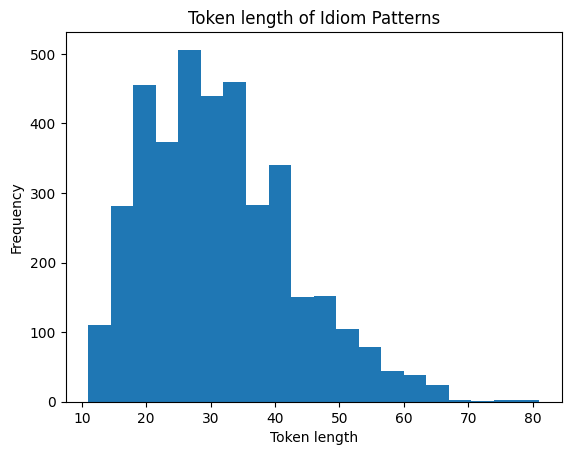

In [19]:
idiom_patterns = [ k+'：'+v for k,v in sub_idioms_dict.items()]
idiom_pattern_length = []
for pattern in idiom_patterns:
    token = tokenizer.encode(pattern)
    idiom_pattern_length.append(len(token))

plt.hist(idiom_pattern_length, bins=20)
plt.title('Token length of Idiom Patterns')
plt.xlabel('Token length')
plt.ylabel('Frequency')
plt.show()



In [ ]:
with open('./data/idioms_ChID.json','w') as f:
    json.dump(sub_idioms_dict, f, ensure_ascii=False)

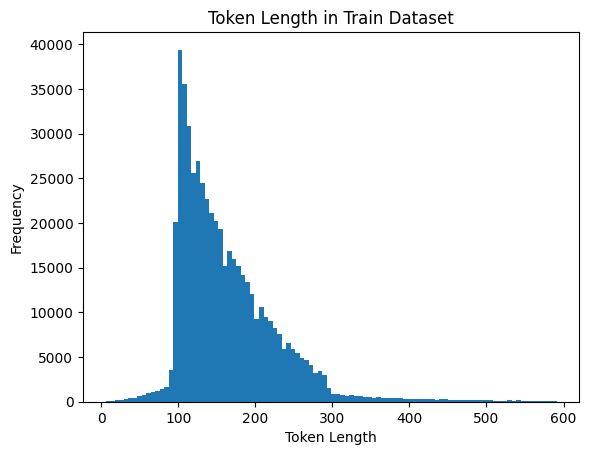

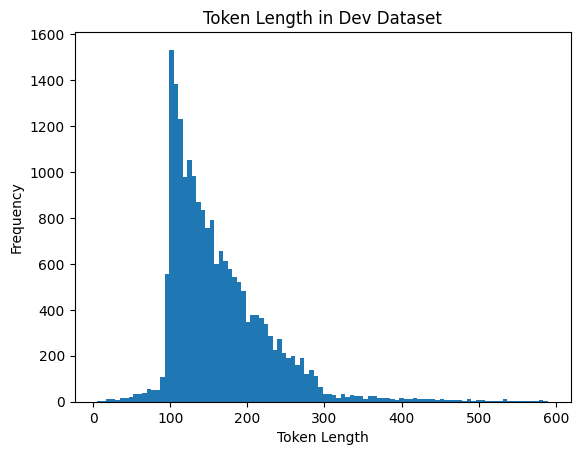

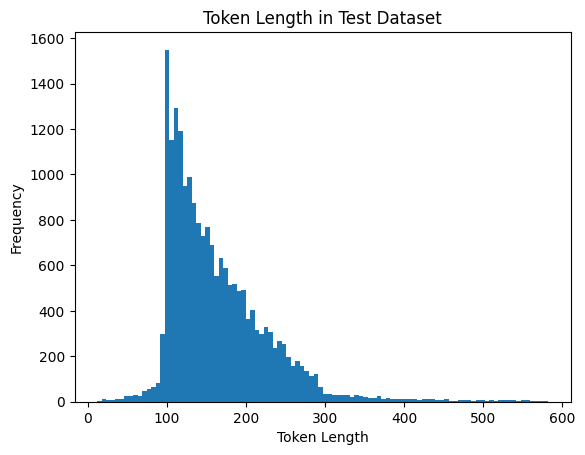

In [14]:
plt.hist(token_train, bins=100)
plt.title("Token Length in Train Dataset")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.show()

plt.hist(token_dev, bins=100)
plt.title("Token Length in Dev Dataset")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.show()

plt.hist(token_test, bins=100)
plt.title("Token Length in Test Dataset")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.show()